# I. INTRODUCTION

If you have a job is a HR , you will spend even more time and money to hire somebody. You want limited time to do it , so you need keep employees happy and satisfied. Now let see the key factors are direct impact into employees attrition rate and satisfaction rates ,purpose for find a way to keep employees continue work in company.


Import all library need.




In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


# II.EXPLORATORY DATA  ANALYSIS



 ## Import data
    
  Read some first row in data.

In [27]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In the dataset , all coloum is call "attrition".You call see almost "attrition" is type numerical and categorical . In the "attrition" coloumns we can use "onehot encoding" change a form that could be provided to Machine Learning algorithms to do a better job in prediction.

In [4]:
attrition.shape

(1470, 35)

dataset has 35 coloums with 1470 samples .

## Check quality data

In [5]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

This is good dataset with no missing values . 

## Describe Data

In [6]:
attrition.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


I see has no problem about mistake or error in data.

## Feature selection

I select 5 features: " Age"," DailyRate" ," DistanceFromHome","YearsAtCompany","EnvironmentSatisfaction". I think this is most importance feature cause employees attrition and statisfactions.

In [79]:
attrition_new=attrition[['Age','DailyRate','DistanceFromHome','YearsAtCompany','Attrition','EnvironmentSatisfaction']]
attrition_new.head()

,Age,DailyRate,DistanceFromHome,YearsAtCompany,Attrition,EnvironmentSatisfaction
0,41,1102,1,6,Yes,2
1,49,279,8,10,No,3
2,37,1373,2,0,Yes,4
3,33,1392,3,8,No,4
4,27,591,2,2,No,1


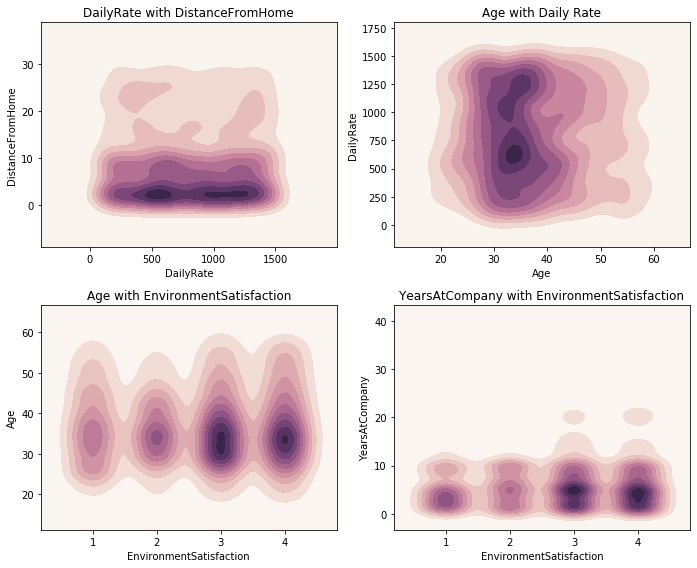

In [69]:
# Plotting 
f, axes = plt.subplots(2, 2, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(xlabel='DailyRate',ylabel='DistanceFromHome', title = 'DailyRate with DistanceFromHome')

cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(xlabel='Age',ylabel='DailyRate', title = 'Age with Daily Rate')

# Generate and plot
x = attrition['EnvironmentSatisfaction'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(xlabel='EnvironmentSatisfaction',ylabel='Age', title = 'Age with EnvironmentSatisfaction')

# Generate and plot
x = attrition['EnvironmentSatisfaction'].values
y = attrition['YearsAtCompany'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(xlabel='EnvironmentSatisfaction',ylabel='YearsAtCompany', title = 'YearsAtCompany with EnvironmentSatisfaction')
f.tight_layout()

If you can see 4 figures . We can see data we have is almost employees has:approximately 30 to 40 ages . Almost people has home is near company ( <10km) . And almost people with time working < 10 year almost feel so good with environment in company.

{'Yes': 237, 'No': 1233}


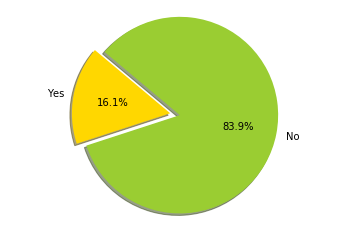

In [78]:
#count value Yes,No in "Attrition" feature
attrition_count={}
for entry in attrition_new["Attrition"]:
    if entry in attrition_count.keys():
        attrition_count[entry]+=1
    else:
        attrition_count[entry]=1

print(attrition_count)

# Data to plot
labels = 'Yes', 'No'
sizes = [attrition_count['Yes'],attrition_count['No']]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

the number of employees is 237 has attrition reach to 16.1% . So this is a large number. We see in 2 feature 'Attrition' is type as categorycal . So we use 'onehot encoding'.

In [80]:
# code for using onehot encoding
attrition_new['Attrition'] = pd.Categorical(attrition_new['Attrition'])
dfDummies = pd.get_dummies(attrition_new['Attrition'])
attrition_new = pd.concat([attrition_new, dfDummies], axis=1)
attrition_new.head()

C:\Users\nhdhc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,DailyRate,DistanceFromHome,YearsAtCompany,Attrition,EnvironmentSatisfaction,No,Yes
0,41,1102,1,6,Yes,2,0,1
1,49,279,8,10,No,3,1,0
2,37,1373,2,0,Yes,4,0,1
3,33,1392,3,8,No,4,1,0
4,27,591,2,2,No,1,1,0


After we using 'onehot encoding' we have 4 feature new is "No" ,"Yes" describe for 'Attrition'. Need to use for t-test.

## Using Hypothesis Testing with t Tests

I use model is Hypothesis Testing with t Tests. Specifically select Paired Samples t Test. With 5 features choose in Feture Selection vs feature 'Atrrition'.

### 1.Age

I have a question : Does employee has >=25 and <=35 ages is say "yes" to quit job in the company?

#### Step1: Indentify
    Population:
      Pop1: All employees >=25 and <=35 ages
      Pop2: All emplyees has "yes" in Attrition

#### Step2: State the null and research hypotheses:
    H0: All employees >= 25 and <= 35 ages has propensity quit job in the company.
    H1: All employees >=25 and <=35 ages has not propensity quit job in the company.

#### Step3,4,5:Characteristics of the comparison distribution ,Determine critical value (cutoffs),Calculate the test statistic

In [143]:
attrition_new_25_35= attrition_new[(attrition_new['Age']>=25) & (attrition_new['Age']<=35)]['Yes']
print(stats.ttest_1samp(attrition_new_25_35,attrition_new['Yes'].mean()))
print("T-critical value",stats.t.ppf(1-0.025, len(attrition_new_25_35) -1))

Ttest_1sampResult(statistic=2.02478073195673, pvalue=0.04331051076568712)
T-critical value 1.9637306259223122


#### Step 6 : Make a decistion
We can see statistic=2.02478073195673 >T-critical= 1.9637306259223122 this mean reject hypothesis.
All employees >=25 and <=35 ages has not propensity quit job in the company.

### 2.DailyRate

I have a question : Does employee has dailyrate low to average  is say "yes" to quit job in the company?

#### Step1: Indentify
    Population:
      Pop1: All employees has dailyrate < average.
      Pop2: All emplyees has "yes" in Attrition.

#### Step2: State the null and research hypotheses:
    H0: All employees has dailyrate < average is propensity quit job in the company.
    H1: All employees has dailyrate < average is not propensity quit job in the company.

#### Step3,4,5:Characteristics of the comparison distribution ,Determine critical value (cutoffs),Calculate the test statistic

In [149]:
attrition_new_dailyrate= attrition_new[(attrition_new['DailyRate']<802.485714)]['Yes']
print(stats.ttest_1samp(attrition_new_dailyrate,attrition_new['Yes'].mean()))
print("T-critical value",stats.t.ppf(1-0.025, len(attrition_new_dailyrate) -1))

Ttest_1sampResult(statistic=1.3726861709099933, pvalue=0.17026861681502306)
T-critical value 1.9631967955598588


#### Step 6 : Make a decistion
We can see statistic=1.3726861709099933 < T-critical= 1.9637306259223122 this mean Fail to reject null hypothesis(not enough facilities).

I have a question : Does employees is male is say "yes" to quit job in the company than female ?

### 3.DistanceFromHome

I have a question : Does employees'house so far is propensity say "yes" to quit job in the company  ?

#### Step1: Indentify
    Population:
      Pop1: All employees has DistanceFromHome > average.
      Pop2: All emplyees has "yes" in Attrition.

#### Step2: State the null and research hypotheses:
    H0: All employees has DistanceFromHome > average has propensity quit job in the company.
    H1: All employees has DistanceFromHome > average has not propensity quit job in the company.

#### Step3,4,5:Characteristics of the comparison distribution ,Determine critical value (cutoffs),Calculate the test statistic

In [162]:
attrition_distance= attrition_new[(attrition_new['DistanceFromHome']>9.192517)]['Yes']
print(stats.ttest_1samp(attrition_distance,attrition_new['Yes'].mean()))
print("T-critical value",stats.t.ppf(1-0.025, len(attrition_distance) -1))

Ttest_1sampResult(statistic=2.027095315471633, pvalue=0.043153625455215595)
T-critical value 1.9644585325748225


#### Step 6 : Make a decistion
We can see statistic=2.027095315471633> T-critical= 1.9644585325748225 this mean reject null hypothesis.
All employees has DistanceFromHome < average has propensity quit job in the company.

### 4.YearsAtCompany

I have a question : Does employees has time in company is say "Yes" to quit job in the company ?

#### Step1: Indentify
    Population:
      Pop1: All employees has YearsAtCompany > average.
      Pop2: All emplyees has "yes" in Attrition.

#### Step2: State the null and research hypotheses:
    H0: All employees has YearsAtCompany > average has propensity quit job in the company.
    H1: All employees has  YearsAtCompany > average has not propensity quit job in the company.

#### Step3,4,5:Characteristics of the comparison distribution ,Determine critical value (cutoffs),Calculate the test statistic

In [195]:
attrition_yearatcompany= attrition_new[(attrition_new['YearsAtCompany']>7.008163)]['Yes']
print(stats.ttest_1samp(attrition_yearatcompany,attrition_new['Yes'].mean()))
print("T-critical value",stats.t.ppf(1-0.025, len(attrition_yearatcompany) -1))

Ttest_1sampResult(statistic=-4.287878920875893, pvalue=2.1457331876747683e-05)
T-critical value 1.964475628237745


#### Step 6 : Make a decistion
We can see statistic=-4.287878920875893< T-critical= -1.9644585325748225 this mean reject null hypothesis.
All employees has YearsAtCompany > average has propensity quit job in the company.

#### Step 6 : Make a decistion
We can see statistic=0.4268924111678747< T-critical= 1.9632234465207086 this mean Fail to reject null hypothesis.


### 5.EnvironmentSatisfaction
I have a question : Does employees has Satisfaction in environment in company is say "No" to quit job in the company ?

#### Step1: Indentify
    Population:
      Pop1: All employees has EnvironmentSatisfaction >=3.
      Pop2: All emplyees has "No" in Attrition.

#### Step2: State the null and research hypotheses:
    H0: All employees has satisfaction in environment has satisfaction in the company.
    H1: All employees hassatisfaction in environmente has not satisfaction in the company.
    

#### Step3,4,5:Characteristics of the comparison distribution ,Determine critical value (cutoffs),Calculate the test statistic

In [187]:
attrition_satis= attrition_new[(attrition_new['MonthlyRate']>=3)]['No']
print(stats.ttest_1samp(attrition_satis,attrition_new['Yes'].mean()))
print("T-critical value",stats.t.ppf(1-0.025, len(attrition_satis) -1))

Ttest_1sampResult(statistic=70.61785551654336, pvalue=0.0)
T-critical value 1.961580181809846


#### Step 6 : Make a decistion
We can see statistic=70.61785551654336> T-critical= 1.961580181809846 this mean reject null hypothesis.
All employees has satisfaction in environment has satisfaction in the company.

# III. CONCLUSION

## 1. Key factors that are playing into current attrition rates is : Age, DistanceFromHome, YearsAtCompany.


## 2.Key factors that are playing into current satisfaction rates : EnvironmentSatisfaction.

## 3.When employees has age > 25 & <35 ages, so far from home to company, time to work is long and not satisfaction in environment in the company.

# THANKS FOR WATCHING